In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pwd

'C:\\Users\\Oluwasomidotun'

In [3]:
data = pd.read_csv('train1.csv')
test  = pd.read_csv('test1.csv')

In [4]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
data.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [7]:
data['len of words'] = data['text'].apply(len)
test['len of words'] = test['text'].apply(len)

In [8]:
data['location'].isnull().value_counts()

False    5080
True     2533
Name: location, dtype: int64

In [9]:
data['keyword'].isnull().value_counts()

False    7552
True       61
Name: keyword, dtype: int64

In [10]:
data.fillna('',inplace=True)
test.fillna('',inplace=True)

In [11]:
#data['combined text']= data['keyword'] + data['location'] + data['text']

In [12]:
#test['combined text']= test['keyword'] + test['location'] + test['text']

In [13]:
import nltk
import string
import re

In [14]:
from nltk.corpus import stopwords
import contractions

In [15]:
def removepuncandlink(text):
    nonum = ''.join([i for i in text if not i.isdigit()])
    links = re.sub(r'http\S+|www\S+', '', nonum)
    link = re.sub(r'\d+', '', links)
    nopunc = [char for char in link if char not in string.punctuation]
    nopunc1 = ''.join(nopunc)
    
    clean = [word for word in nopunc1.split() if word.lower() not in stopwords.words('english')]
    
    return clean
    

In [16]:
def con(text):
    
    y=' '.join(text)
    z=contractions.fix(y)
    return z.split()

In [17]:
def low(text):
    y=' '.join(text)
    z=y.lower()
    return z

In [18]:
data['text']=data['text'].apply(removepuncandlink)

In [19]:
test['text']=test['text'].apply(removepuncandlink)

In [20]:
data['text']=data['text'].apply(con)

In [21]:
data['text'] = data['text'].apply(low)

In [22]:
test['text']=test['text'].apply(con)

In [23]:
test['text'] = test['text'].apply(low)

In [24]:
data['text']

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       people receive wildfires evacuation orders cal...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest control wild fires cali...
7610                                 utckm volcano hawaii
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [25]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

In [26]:
def lemma(text):
    #for x in text:
    return lem.lemmatize(text)
    
    

In [27]:
data['text'].apply(lemma)

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       people receive wildfires evacuation orders cal...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest control wild fires cali...
7610                                 utckm volcano hawaii
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

array([<AxesSubplot: title={'center': '0'}>,
       <AxesSubplot: title={'center': '1'}>], dtype=object)

<Figure size 1200x1200 with 0 Axes>

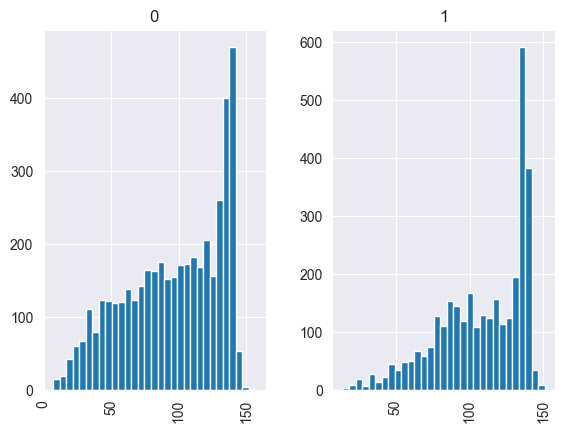

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,12))
data['len of words'].hist(bins=31,by=data['target'])

<AxesSubplot: xlabel='target', ylabel='count'>

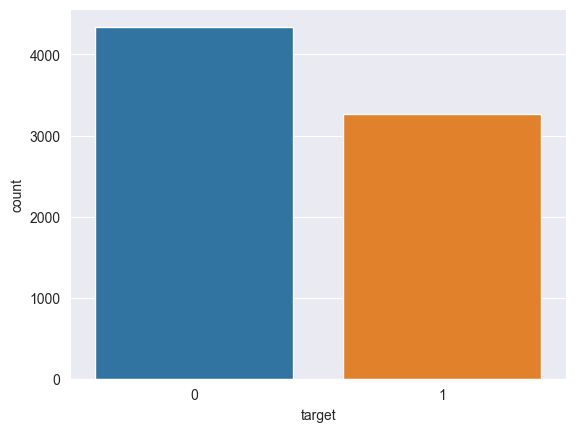

In [29]:
sns.countplot(data,x='target')

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
# Might take awhile...
bow_transformer = CountVectorizer().fit(data['text'])

# Print total number of vocab words
#print(len(bow_transformer.vocabulary_))

In [60]:
messages_bow = bow_transformer.transform(data['text'])

In [32]:
print(bow_transformer.get_feature_names_out()[4068])

disease


In [61]:
#bow_transformer = CountVectorizer(analyzer=removepuncandlink).fit(test['text'])

# Print total number of vocab words
#print(len(bow_transformer.vocabulary_))
messages_bow_test = bow_transformer.transform(test['text'])

In [34]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format((sparsity)))

sparsity: 0.05369677731297072


In [62]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)


(7613, 16785)


In [63]:

messages_tfidf_test = tfidf_transformer.transform(messages_bow_test)
print(messages_tfidf_test.shape)

(3263, 16785)


In [55]:
messages_tfidf

<7613x16785 sparse matrix of type '<class 'numpy.float64'>'
	with 68616 stored elements in Compressed Sparse Row format>

In [56]:
messages_tfidf_test

<3263x10042 sparse matrix of type '<class 'numpy.float64'>'
	with 29002 stored elements in Compressed Sparse Row format>

In [64]:
from  sklearn.model_selection import train_test_split 

In [65]:
X_train, X_test, y_train, y_test = train_test_split(messages_tfidf, data['target'], test_size=0.4, random_state=42)


In [66]:
from sklearn.naive_bayes import MultinomialNB
disaster_detect_model = MultinomialNB().fit(X_train, y_train)


In [67]:
all_predictions = disaster_detect_model.predict(X_test)

In [68]:
from sklearn.metrics import classification_report
print (classification_report(y_test, all_predictions))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1748
           1       0.85      0.65      0.73      1298

    accuracy                           0.80      3046
   macro avg       0.81      0.78      0.79      3046
weighted avg       0.81      0.80      0.80      3046



In [69]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [70]:
lg.fit(X_train, y_train)

LogisticRegression()

In [71]:
lg_prediction= lg.predict(X_test)
print (classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1748
           1       0.87      0.62      0.73      1298

    accuracy                           0.80      3046
   macro avg       0.82      0.78      0.78      3046
weighted avg       0.81      0.80      0.79      3046



In [45]:
Xtrain = messages_tfidf 

In [ ]:
ytrain = data['target']

In [75]:
test['id']

0           0
1           2
2           3
3           9
4          11
        ...  
3258    10861
3259    10865
3260    10868
3261    10874
3262    10875
Name: id, Length: 3263, dtype: int64

In [72]:
main_model = lg.fit(messages_tfidf, data['target'])


In [73]:
prediction = lg.predict(messages_tfidf_test)

In [74]:
prediction

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [79]:
submission = pd.DataFrame({'id': test['id'],'target': prediction})

In [80]:
submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [84]:
sns.set_style('darkgrid')

<AxesSubplot: xlabel='target', ylabel='count'>

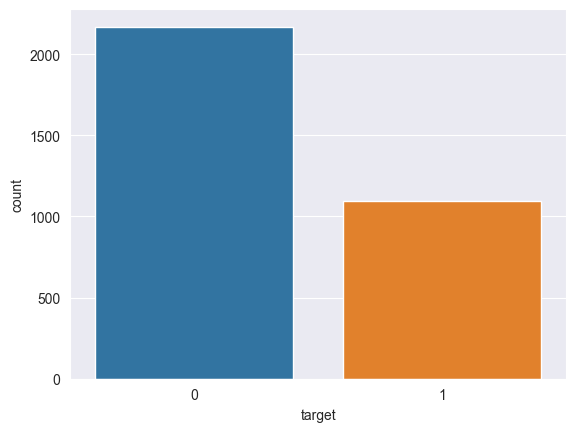

In [89]:
sns.countplot(data=submission,x='target')

In [90]:
submission.to_csv('submision.csv')